In [1]:
# library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb
from scipy import stats
import statsmodels.api as sm

In [2]:
# read original data file
data = pd.read_csv('dali_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,14,18,20,22,23,24,26,27,28,29,32,33,35,44,49,53,54,55,56,74,76,77,79,80,81,82,83,86,87,89,93,94,95,98,102,109,110,111,112,116,119,120,124,125,126,127,128,129,130,131,132,133,137,138,139,140,142,144,145,146,150,151,153,155,157,159,160,161,162,163,164,166,170,172,173,174,176,177,178,179,180,181,182,183,184,187,188,189,190,192,194,198,202,204,205,206,208,209,210,211,212,213,214,215,216,217,221,222,225,227,228,229,230) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
len(data['product_name'].unique()), len(data['product_no']), len(data['product_no'].unique())

(2231, 72659, 816)

In [30]:
data['product_no'].loc[np.isnan(data['product_no'])]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
61381   NaN
61382   NaN
61383   NaN
61384   NaN
61385   NaN
Name: product_no, Length: 61386, dtype: float64

In [32]:
sorted(data['size'].unique())

['15.5CM',
 '17.5CM',
 '225',
 '230',
 '235',
 '240',
 '245',
 '25',
 '250',
 '26',
 '27',
 '28',
 '29',
 '30',
 '44',
 '55',
 '55(1)',
 '66',
 '66(2)',
 '77',
 '77(3)',
 'F(S.M)',
 'FREE',
 'IPHONE 11 PRO',
 'L',
 'L(2)',
 'L(FREE)',
 'LONG',
 'LONG 55',
 'LONG 66',
 'LONG 77',
 'LONG M',
 'LONG S',
 'LONG66',
 'LONG77',
 'M',
 'M(1)',
 'MIDI',
 'MIDI M',
 'MIDI S',
 'MINI',
 'M~L',
 'ONE',
 'REGULAR',
 'REGULAR 55',
 'REGULAR 66',
 'REGULER 77',
 'S',
 'XL',
 'XL~XXL',
 'XS',
 'XXL',
 'no_size',
 '남성용, FILTER=비말방지필터_20매입',
 '남성용, FILTER=선택안함',
 '아동용, FILTER=비말방지필터_20매입',
 '여성용, FILTER=비말방지필터_20매입',
 '여성용, FILTER=선택안함']

In [4]:
list(data.columns)

['order_id',
 'order_item_code',
 'orderPlatformCode',
 'order_date',
 'payment_date',
 'category',
 'product_material',
 'cloth_fabric',
 'option_value',
 'supplier_id',
 'totalCnt',
 'product_name',
 'product_price',
 'quantity',
 'paymentPlatformName',
 'order_place_name',
 'order_from_mobile',
 'exchange_status',
 'return_date',
 'return_status',
 'naverpayCancel',
 'cancellation_status',
 'cancelNum',
 'cancel_date',
 'cancelType',
 'member_id',
 'created_date',
 'ordererCall',
 'group_no_when_ordering',
 'group_no',
 'membership_discount_amount',
 'shipping_fee_discount_amount',
 'promotionName',
 'promotionType',
 'promotionPrice',
 'couponName',
 'couponPrice',
 'couponPrice2',
 'couponPoint',
 'coupon_discount_price',
 'coupon/rankPoint',
 'pointReturn',
 'final_points_spent_amount',
 'productPoint',
 'pointType',
 'plusappPoint',
 'pointReturn2',
 'rankPoint',
 'appProductPromotion',
 'appProductPromotionType',
 'app_discount_amount',
 'appOrderPromotionType',
 'immediateProm

In [13]:
data.loc[data['product_name'] == 'Frill Square Neckline Dress']['product_no']

68829    2746.0
Name: product_no, dtype: float64

In [15]:
data.loc[data['product_name'] == 'Backyard Linen Sleeveless Jumpsuit_H64698']['product_no']

68794    2749.0
69832    2749.0
70578    2749.0
70777    2749.0
71518    2749.0
Name: product_no, dtype: float64

In [6]:
dataset = pd.DataFrame(
    columns=["order_date", "item_category", "item_id", "item_color", "item_quantity", "initial_price"])

dataset[["order_date", "item_category", "item_quantity", "initial_price"]] = data[
    ["date", "category", "quantity", "assume_initial_price"]]

# separate item ID and item color
dataset["item_id"] = pd.DataFrame(data["order_id"].str.split('-').tolist())[1]
dataset["item_color"] = pd.DataFrame(data["order_item_code"].str.split('-').tolist())[2]

In [7]:
dataset

,order_date,item_category,item_id,item_color,item_quantity,initial_price
0,2019-11-07,블라우스,0000032,01,1,38000.0
1,2019-11-08,원피스,0000333,01,1,29000.0
2,2019-11-10,블라우스,0000998,01,1,39000.0
3,2019-11-10,스커트,0001550,01,1,13800.0
4,2019-11-11,니트,0000684,01,1,14800.0
...,...,...,...,...,...,...
72654,2020-05-31,니트,0000055,02,1,22800.0
72655,2020-05-31,원피스,0000055,03,1,42000.0
72656,2020-05-31,잠옷/홈웨어,0000055,04,1,4000.0
72657,2020-05-31,잠옷/홈웨어,0000055,05,1,6000.0


In [26]:
total = dataset.groupby(['order_date']).sum().reset_index()

total

,order_date,item_quantity,initial_price
0,2019-01-01,6,232400.0
1,2019-01-02,2,79000.0
2,2019-01-03,5,182800.0
3,2019-01-04,1,39800.0
4,2019-01-05,3,94800.0
...,...,...,...
506,2020-05-26,493,21121000.0
507,2020-05-27,596,25991900.0
508,2020-05-28,383,15396900.0
509,2020-05-30,200,8317600.0


In [28]:
print(len(total['order_date']))
print(len(pd.date_range('2019-01-01', '2020-05-31', freq='d')))

511
517


In [38]:
# make date column consecutively
df_total = pd.DataFrame(columns=["Date", "item_quantity", "total_price"])
df_total['Date'] = pd.date_range('2019-01-01', '2020-05-31', freq='d')

In [39]:
temp = total.to_dict('records')

for values in temp:
    df_total['item_quantity'].mask(
        df_total['Date'] == values['order_date'], values['item_quantity'], inplace=True)
    df_total['total_price'].mask(
        df_total['Date'] == values['order_date'], values['initial_price'], inplace=True)

In [40]:
# fillna(0)?? or fillna(bfill())?? -> Choose one!!!
df_total = df_total.fillna(df_total.bfill())

df_total

,Date,item_quantity,total_price
0,2019-01-01,6,232400
1,2019-01-02,2,79000
2,2019-01-03,5,182800
3,2019-01-04,1,39800
4,2019-01-05,3,94800
...,...,...,...
512,2020-05-27,596,2.59919e+07
513,2020-05-28,383,1.53969e+07
514,2020-05-29,200,8.3176e+06
515,2020-05-30,200,8.3176e+06


In [63]:
def show_plot(df, value, title):
    fig, ax = plt.subplots(figsize=(15, 8))

    ax.plot(df['Date'], df[value])
    ax.set(xlabel="Date", ylabel=value, title=title)
    plt.show()

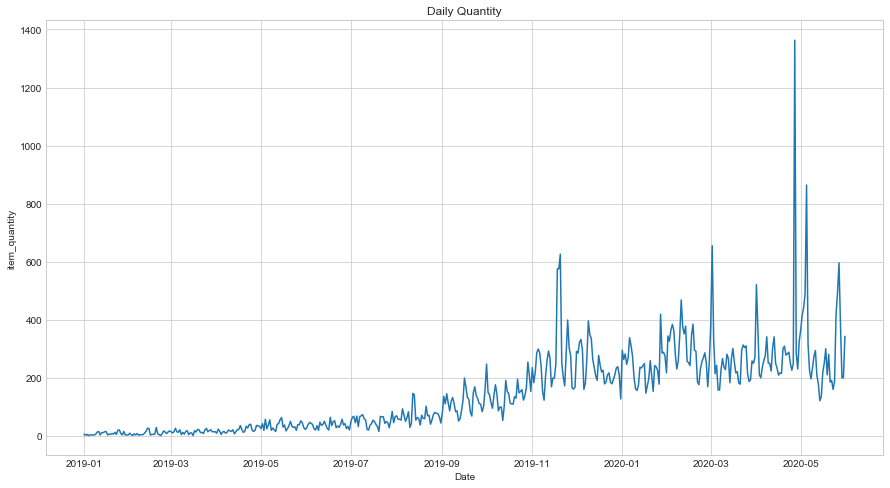

In [64]:
plt.style.use('seaborn-whitegrid')

# show graph of daily quantity
show_plot(df_total, 'item_quantity', 'Daily Quantity')

In [61]:
def show_dist(df, value):
    rcParams['figure.figsize'] = 16, 8

    sb.distplot(df[value])

    fig = plt.figure()
    res = stats.probplot(df[value].astype(float), plot=plt)
    plt.show()

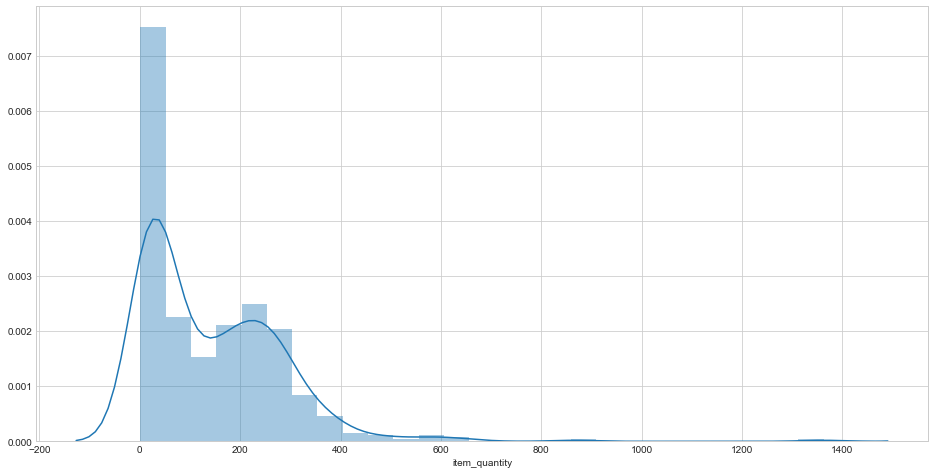

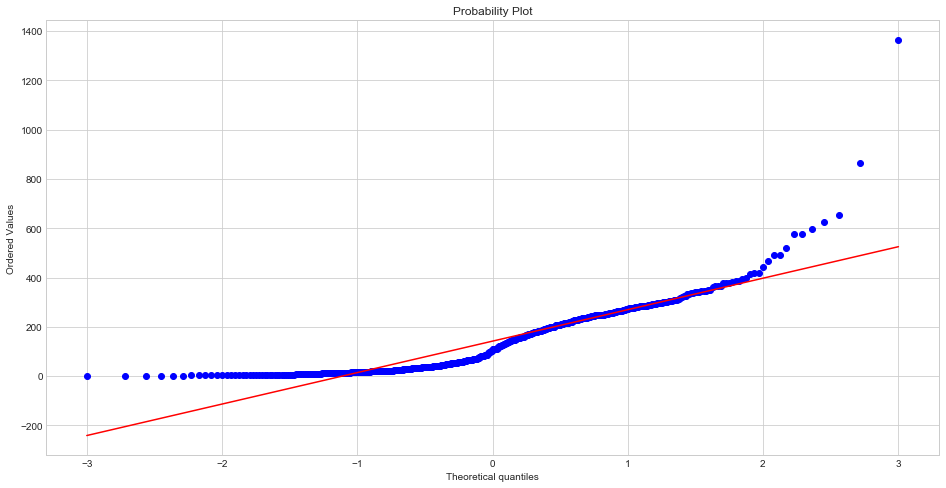

In [62]:
# show graph of item quantity distribution
show_dist(df_total, 'item_quantity')

In [49]:
df_total

,Date,item_quantity,total_price
0,2019-01-01,6,232400
1,2019-01-02,2,79000
2,2019-01-03,5,182800
3,2019-01-04,1,39800
4,2019-01-05,3,94800
...,...,...,...
512,2020-05-27,596,2.59919e+07
513,2020-05-28,383,1.53969e+07
514,2020-05-29,200,8.3176e+06
515,2020-05-30,200,8.3176e+06


In [65]:
df_category = dataset.groupby(["item_category", "order_date"]).sum()

In [66]:
df_category

item_quantity  initial_price
item_category order_date                              
가디건           2019-04-27              1        21000.0
              2019-05-17              1        21000.0
              2019-06-04              1        12800.0
              2019-07-01              1        12800.0
              2019-07-10              1        12800.0
...                                 ...            ...
휴대폰케이스        2020-02-18              1        12000.0
              2020-02-19              1        12000.0
              2020-02-26              1        12000.0
              2020-02-27              1        12000.0
              2020-04-20              1        24800.0

[6537 rows x 2 columns]

In [84]:
def reconstruct_date(dataset, criteria, item):
    df_origin = dataset.groupby([criteria, "order_date"]).sum().reset_index()
    
    df_temp = df_origin.loc[df_origin[criteria] == item].to_dict('records')
    
    df_new = pd.DataFrame(columns=["Date", criteria, "item_quantity", "total_price"])
    df_new["Date"] = pd.date_range('2019-01-01', '2019-12-31', freq='d')
    df_new[criteria] = item
    df_new = df_new.fillna(0)
    
    for values in df_temp:
        df_new['item_quantity'].mask(
            df_new['Date'] == values['order_date'], values['item_quantity'], inplace=True)
        df_new['total_price'].mask(
            df_new['Date'] == values['order_date'], values['initial_price'], inplace=True)
        
    return df_new.set_index('Date')

In [85]:
df_cardigan = reconstruct_date(dataset, "item_category", "가디건")

In [86]:
df_cardigan

,item_category,item_quantity,total_price
Date,,,
2019-01-01,가디건,0,0
2019-01-02,가디건,0,0
2019-01-03,가디건,0,0
2019-01-04,가디건,0,0
2019-01-05,가디건,0,0
...,...,...,...
2019-12-27,가디건,2,98000
2019-12-28,가디건,1,62000
2019-12-29,가디건,1,18800


In [132]:
def show_trend(df_item, criteria):
    y = df_item[criteria].resample('3d').mean()
    
    #rcParams['figure.figsize'] = 18, 8
    #decomposition = sm.tsa.seasonal_decompose(y, model='additive', two_sided=False, freq=12)
    #fig = decomposition.plot(title="Seasonal Decomposition")
    #plt.show()
    
    #return decomposition
    
    rcParams['figure.figsize'] = 16, 4
    
    stl = sm.tsa.STL(df_cardigan['item_quantity'], seasonal=3)
    res = stl.fit()
    fig = res.plot()
    
    

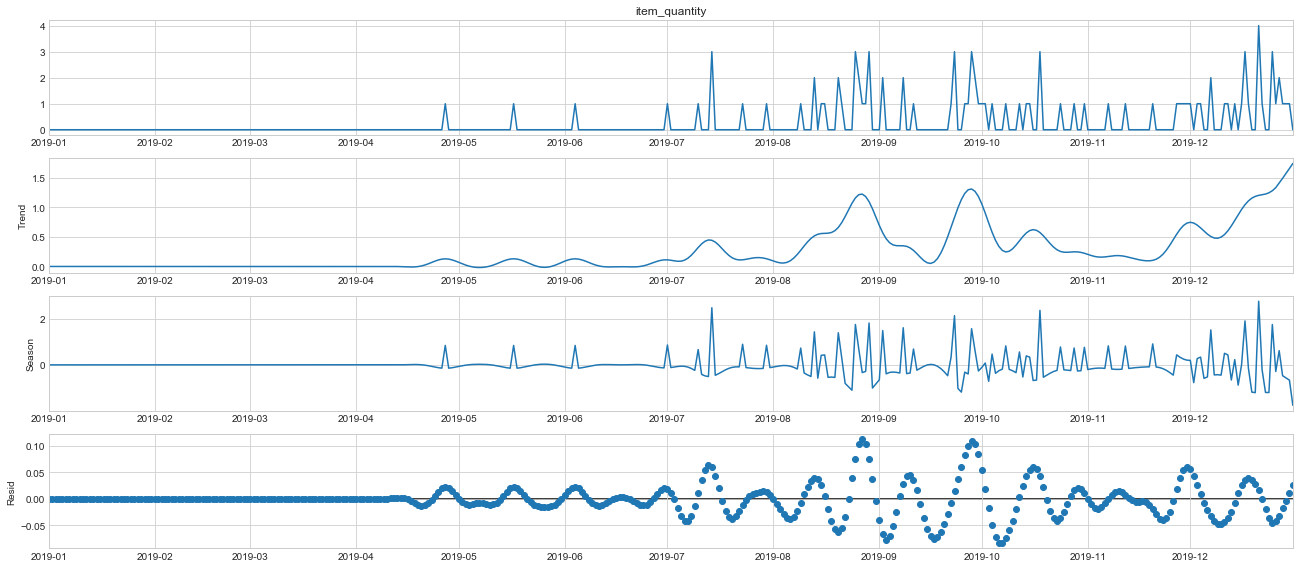

In [140]:
stl = sm.tsa.STL(df_cardigan['item_quantity'], seasonal=3)
res = stl.fit()
fig = res.plot()

# 이정도 추세??? 급성장하는 구간만 1로 라벨링???

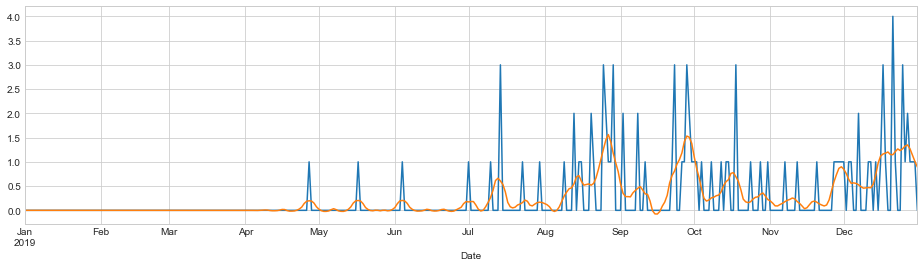

In [181]:
rcParams['figure.figsize'] = 16, 4

#df_cardigan['item_quantity'].plot()
stl = sm.tsa.STL(df_cardigan['item_quantity'], trend=9)
res = stl.fit()
res.observed.plot()
res.trend.plot()

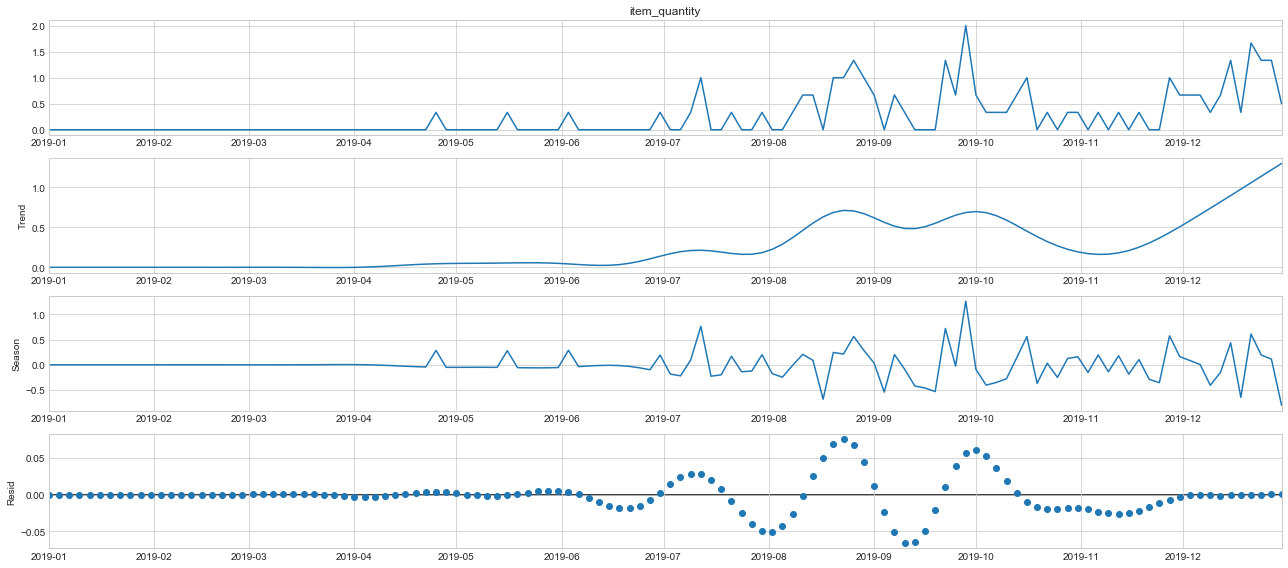

In [137]:
y = df_cardigan['item_quantity'].resample('3d').mean()

stl = sm.tsa.STL(y, seasonal=3)
res = stl.fit()
fig = res.plot()


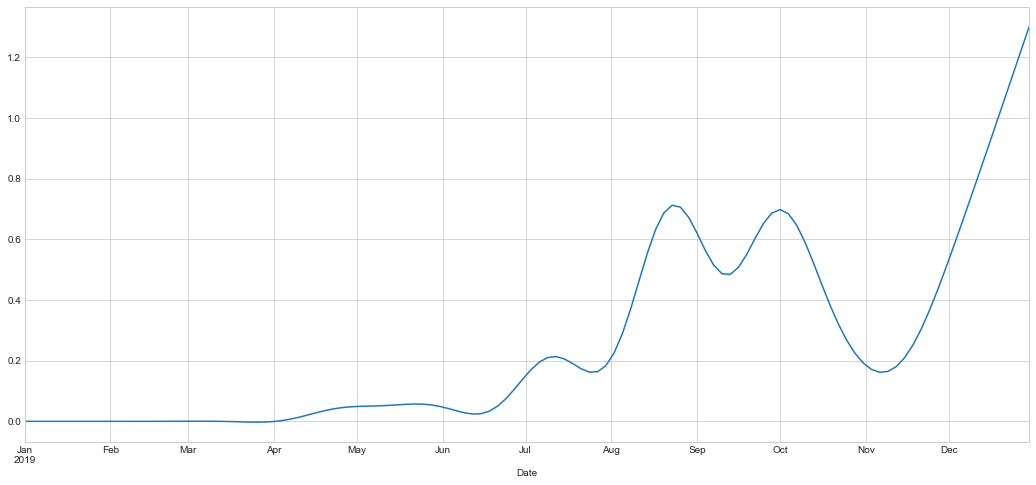

In [138]:
res.trend.plot() # 일년 단위로 크게 봤을 때 판매 경향성??

In [1]:
temp = [[[7, 4], 124, 655, 655], [[7, 5], 200, 800, 800]]

In [6]:
df_temp = pd.DataFrame([[124, 655, 655], [200, 800, 800]])

(array([[1., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 2.]]),
 array([124. , 191.6, 259.2, 326.8, 394.4, 462. , 529.6, 597.2, 664.8,
        732.4, 800. ]),
 <a list of 2 Lists of Patches objects>)

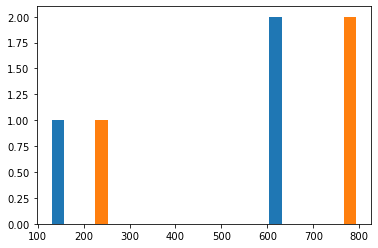

In [7]:
plt.hist(df_temp)

In [ ]:
standards = [standard for standard in range(3, 8)]

origin_count = {}
accumulated_count = {}
stop = 0

for lst_value in lst_label_count:    
    if stop is len(standards) or stop is 0:
        if stop is not 0:
            draw_bar(window_num, standards, origin_count, accumulated_count)
            print(origin_count[window_num])
            print(accumulated_count[window_num])
        
        stop = 0
        
        window_num = lst_value[0][0]
        origin_count[window_num] = []
        accumulated_count[window_num] = []
               
    origin_count[window_num].append(lst_value[1])
    accumulated_count[window_num].append(lst_value[2])
    
    stop += 1
    
    if lst_value is lst_label_count[len(lst_label_count)-1]:
        draw_bar(window_num, standards, origin_count, accumulated_count)
        print(origin_count[window_num])
        print(accumulated_count[window_num])